In [1]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import glob as gb
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
os.getcwd()

'/home/emmy/Desktop/Data Science Course'

In [3]:
img_path = gb.glob("Hoda 0-9/*.bmp")
print(img_path[-5:-1])
print(len(img_path))

['Hoda 0-9/4_1026.bmp', 'Hoda 0-9/4_665.bmp', 'Hoda 0-9/7_544.bmp', 'Hoda 0-9/6_559.bmp']
1698


In [4]:
img_path

['Hoda 0-9/4_640.bmp',
 'Hoda 0-9/2_410.bmp',
 'Hoda 0-9/9_936.bmp',
 'Hoda 0-9/1_762.bmp',
 'Hoda 0-9/4_1216.bmp',
 'Hoda 0-9/4_414.bmp',
 'Hoda 0-9/3_1685.bmp',
 'Hoda 0-9/6_1272.bmp',
 'Hoda 0-9/7_1020.bmp',
 'Hoda 0-9/6_420.bmp',
 'Hoda 0-9/7_447.bmp',
 'Hoda 0-9/0_1416.bmp',
 'Hoda 0-9/3_372.bmp',
 'Hoda 0-9/8_180.bmp',
 'Hoda 0-9/3_321.bmp',
 'Hoda 0-9/7_216.bmp',
 'Hoda 0-9/6_1612.bmp',
 'Hoda 0-9/6_100.bmp',
 'Hoda 0-9/8_814.bmp',
 'Hoda 0-9/8_476.bmp',
 'Hoda 0-9/7_865.bmp',
 'Hoda 0-9/1_190.bmp',
 'Hoda 0-9/4_225.bmp',
 'Hoda 0-9/2_1583.bmp',
 'Hoda 0-9/9_1202.bmp',
 'Hoda 0-9/6_322.bmp',
 'Hoda 0-9/8_649.bmp',
 'Hoda 0-9/1_495.bmp',
 'Hoda 0-9/0_818.bmp',
 'Hoda 0-9/2_102.bmp',
 'Hoda 0-9/0_179.bmp',
 'Hoda 0-9/9_1143.bmp',
 'Hoda 0-9/1_582.bmp',
 'Hoda 0-9/8_109.bmp',
 'Hoda 0-9/8_1335.bmp',
 'Hoda 0-9/1_1071.bmp',
 'Hoda 0-9/6_1137.bmp',
 'Hoda 0-9/6_561.bmp',
 'Hoda 0-9/9_472.bmp',
 'Hoda 0-9/4_1310.bmp',
 'Hoda 0-9/2_1588.bmp',
 'Hoda 0-9/6_1110.bmp',
 'Hoda 0-9/9_989.bm

In [5]:
x = []
y = []
for i in range(0, len(img_path)):
    p = img_path[i]
    img = cv2.imread(p,0)
    img = cv2.resize(img,dsize=(10,10))
    F = np.reshape(img, newshape=(100,))
    index = p.find("_")
    Label = int(p[index-1])
    x.append(F)
    y.append(Label)
    print(F)

[255 255 255   0   0 255 255 255 255 255 255   0   0 255 255 255 255 255
 255 255   0   0 255 255 255 255 255 255 255 255 255  10   0   0 255 255
 255 255 255 255 255 255 255   0 204 255 255 255 255 255 255 255   0   0
 255 255 255 255 255 255 255   0   0 255 255 255 255 255 255 255   0   0
 255 255 255 255 255 255 255 255   0   0 255 255 255 255 255 255 255 255
 255  71   0   0   0   0   0   0   0   0]
[106   0  45  89  89   0   0   0   0 106   0   0   0   0   0   0   0   0
  73 255  25   0   0 255 255 255 255 255 255 255  25   0   0 255 255 255
 255 255 255 255 255   0   0 255 255 255 255 255 255 255 255   0   0  76
 255 255 255 255 255 255 255  34   0  76 255 255 255 255 255 255 255  76
   0  76 255 255 255 255 255 255 255 255   0  76 255 255 255 255 255 255
 255 255  45 139 255 255 255 255 255 255]
[255 255 255  61   0   0   0 255 255 255 102   0  26 255 255 255 255   0
 255 255   0 229 255 255 255 255  51   0 255 255 255   0   0   0   0  10
   0   0 255 255 255 255 255 255 255 255

[  0   0   0   0 138 255 255 255 255 255   0   0   0   0   0  25 255 255
 255 255   0   0   0   0   0  26 255 255 255 255 229   0   0   0   0   0
  15 153 255 255 229   0   0   0   0   0   0 127 255 255 255 209  51   0
   0   0   0   0 107 245 255 255 255 112   5   0   0   0   0 229 255 255
 255 255 255   0   0   0   0   0 255 255 255 255 255 184   0   0   0   0
 255 255 255 255 255 229   0   0   0 229]
[255 255  83   0   0   0   0   0 255 255 255   9 255 255 255 255 255 255
 255 255 255   0 128 255 255 255 255 255 255 255 255 255 179   0   0 255
 255 255 255 255 149   1 255 255 255 255 255 255 255 255   0 255 255 255
 255 255 255 255 255 255   0 255 255 255 255 255 255 255 255 255 255   0
 255 255 255 255 255 255 255 255 255 255   0  80 255 255 255 255 255 255
 255 255 255 255  26   0   0   0   0   0]
[255 255 255  10   0 255 255 255 255 255 255 255 127   0 143 255 255 255
  71  15 255 255   0   0 255 255 255   0   0 255 255 255 255   5   0   0
   0   0 255 255 255 255 255 255   0   0

[255 255 255 255 255 255 127   0 210 255 255 255 255 255 255 134   0   0
   0 249 255 255 255 255 255 255  96   0   0 127 255 255 255 255 255 255
  70   0   0  57 236   0 108 146 217   0   0   0   0 127 127   0   0 146
   0   0   0   0   0 236   0   0   0   0   0   0   0   0  70 255 159  64
   0   0   0   0   0   0 159 255 255 255 121   0   0   0   0 121 255 255
 255 255 255  83   0   0 166 255 255 255]
[255 255 255 255 255 255 255 255 255   0 255 255 255 255 255 255 255 255
  89   0 255   0  64 255 255 255 255 255   0   0 255 255 217   0   8 255
 255 255   0 140 255 255 255 255   0   0 255 255   0 163 255 255 255 255
 255   0   0 255   0 140 255 255 255 255 255 255   0  76   0 140 255 255
 255 255 255 255   0   0   0   0 255 255 255 255 255 255 255   0   0   0
 255 255 255 255 255 255 255 217   0 140]
[255  38  38   0   0   0   0   0   0  25   0   0   0 115 255 136   0 140
 249 255   0   0   0 115 226  64 255 255 255 255   0   0   0 115 255 255
 255 255 255 255   0   0   0  40 255 255

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=1)

In [7]:
MLP = MLPClassifier(hidden_layer_sizes=(90,30),
                    max_iter=500,
                    activation="logistic",
                    solver="adam",
                    batch_size=500,
                    learning_rate="adaptive",
                    tol=0.001,
                    momentum=0.7,
                    verbose=True,
                    shuffle=True
                    )
MLP.fit(x_train, y_train)
y_pred = MLP.predict(x_test)
y_score = MLP.predict_proba(x_test)
print('\n',"Score on train date :", MLP.score(x_train, y_train)*100)
print('\n',"Score on test date :", MLP.score(x_test, y_test)*100, '\n')
print(y_score)

Iteration 1, loss = 2.39549010
Iteration 2, loss = 2.35074338
Iteration 3, loss = 2.31972189
Iteration 4, loss = 2.29594818
Iteration 5, loss = 2.27669648
Iteration 6, loss = 2.26047850
Iteration 7, loss = 2.24549337
Iteration 8, loss = 2.23053083
Iteration 9, loss = 2.21544292
Iteration 10, loss = 2.19947335
Iteration 11, loss = 2.18356348
Iteration 12, loss = 2.16725732
Iteration 13, loss = 2.15048895
Iteration 14, loss = 2.13440162
Iteration 15, loss = 2.11561042
Iteration 16, loss = 2.09559061
Iteration 17, loss = 2.07649833
Iteration 18, loss = 2.05607471
Iteration 19, loss = 2.03427424
Iteration 20, loss = 2.01251841
Iteration 21, loss = 1.99059329
Iteration 22, loss = 1.96697866
Iteration 23, loss = 1.94280900
Iteration 24, loss = 1.91844460
Iteration 25, loss = 1.89458751
Iteration 26, loss = 1.86786775
Iteration 27, loss = 1.84344431
Iteration 28, loss = 1.81662226
Iteration 29, loss = 1.79107047
Iteration 30, loss = 1.76693282
Iteration 31, loss = 1.74181914
Iteration 32, los

Iteration 289, loss = 0.13110004
Iteration 290, loss = 0.13036577
Iteration 291, loss = 0.12987189
Iteration 292, loss = 0.12922901
Iteration 293, loss = 0.12949860
Iteration 294, loss = 0.12909423
Iteration 295, loss = 0.12736294
Iteration 296, loss = 0.12813572
Iteration 297, loss = 0.12859782
Iteration 298, loss = 0.12561750
Iteration 299, loss = 0.12679947
Iteration 300, loss = 0.12637977
Iteration 301, loss = 0.12540456
Iteration 302, loss = 0.12449044
Iteration 303, loss = 0.12382005
Iteration 304, loss = 0.12294505
Iteration 305, loss = 0.12241554
Iteration 306, loss = 0.12167573
Iteration 307, loss = 0.12109402
Iteration 308, loss = 0.12055878
Iteration 309, loss = 0.11998799
Training loss did not improve more than tol=0.001000 for 10 consecutive epochs. Stopping.

 Score on train date : 97.49631811487481

 Score on test date : 84.41176470588235 

[[8.49267615e-03 9.65441604e-01 4.22901245e-03 ... 4.98115234e-05
  6.34024234e-04 1.91584215e-03]
 [1.65729883e-03 9.61979883e-03 1

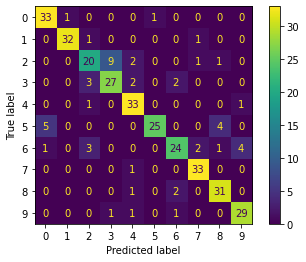

In [8]:
plot_confusion_matrix(MLP, x_test, y_test)
plt.show()